<a href="https://colab.research.google.com/github/lmoghimi/personal-processing/blob/main/xrd_analysis_Lauren.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Run these first

In [3]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import heapq

# timestamps = ['primary-1', ]
shift = True            #
get_timestamps = True
ntimestamps = 2
#ntimestamps_depths
lw = 0.75 #linewidth
userdir = "/content/drive/Shareddrives/leoradm_group/NSLS-II_202403"
scriptdir = os.path.join(userdir, 'userScripts')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Peak positions for reference + save settings
wavelength = 0.1824 #angstrom
'''
ref_tth_fe = [5.205, 9.022, 7.364, 10.421, 11.656, 12.772, 13.801, 14.759] #2theta
ref_d_fe = 0.5*wavelength/np.sin(np.radians(np.divide(ref_tth_fe,2))) #conversion to d
ref_q_fe = 2*np.pi/ref_d_fe #conversion to q
'''
#ref_q_fe = [3.128, 5.419, 4.424, 6.995, 8.277, 6.257, 7.663]
ref_q_fe = [3.128, 5.419, 4.424]
#lincol_fe='tab:green' #iron
lincol_fe='tab:brown'

'''
ref_tth_w = [4.833, 6.837, 4.185, 8.019, 10.820, 8.376, 11.856, 10.545] #remove 3rd number if plot in tth
ref_d_w = 0.5*wavelength/np.sin(np.radians(np.divide(ref_tth_w,2)))
ref_q_w = 2*np.pi/ref_d_w
'''
#ref_q_w = [2.905, 4.108, 2.516, 4.817, 6.495, 5.031, 7.115, 6.331, 8.715, 8.593, 7.547, 8.216, 5.810]
ref_q_w = [2.905, 4.108, 2.516]
#lincol_w='tab:red' #wustite
lincol_w='tab:pink'

'''
ref_tth_m = [4.145, 7.083, 6.520, 3.540, 9.639, 5.019, 6.143, 8.324, 10.846] #remove 1st one if plot in tth
ref_d_m = 0.5*wavelength/np.sin(np.radians(np.divide(ref_tth_m,2)))
ref_q_m = 2*np.pi/ref_d_m
'''
#ref_q_m = [2.4783, 2.5973, 4.2458, 3.8889, 2.1214, 2.9982, 5.7584, 3.6680, 1.2887, 4.9086]
ref_q_m = [2.4783, 2.5973, 4.2458]
#lincol_m='tab:purple' #magnetite
lincol_m='tab:green'

'''
ref_tth_h = [3.870, 4.150, 6.167, 5.675, 7.033, 7.190, 2.837, 7.973] #remove 2nd number if plot in tth
ref_d_h = 0.5*wavelength/np.sin(np.radians(np.divide(ref_tth_h,2)))
ref_q_h = 2*np.pi/ref_d_h
'''
#ref_q_h = [2.4985, 2.3135, 3.7118, 4.3288, 3.41365, 4.2259, 1.6965, 2.8481, 4.8017, 3.92775, 4.9868, 5.6860, 5.5009, 5.9533, 6.5394]
ref_q_h = [2.4985, 2.3135, 3.7118]
#lincol_h='tab:orange' #hematite
lincol_h='tab:cyan'

lincol_h_ore = 'tab:purple'

lincol_magh='tab:olive' #maghemite

lincol_qz = 'tab:gray' #quartz

#lincol_wf = 'tab:blue' #sets the line color for the waterfall series
#lincol_wf = 'navy'

#Would you like to save the plots? Enter y/n
response = "n" ##### at some point it would be nice to make this pop up as a prompt so that we don't forget to change the response
xrd_type = "q" ##### d or tth or q. also make this pop up as a prompt

Loading file /content/drive/Shareddrives/leoradm_group/NSLS-II_202403/tiff_base/run52_limelight_pellet_H2_blue/integration/run52_limelight_pellet_H2_blue_20240328-164902_ec7cd7_primary-1_mean_tth.chi
Loading file /content/drive/Shareddrives/leoradm_group/NSLS-II_202403/tiff_base/run52_limelight_pellet_H2_blue/integration/run52_limelight_pellet_H2_blue_20240328-164902_ec7cd7_primary-124_mean_tth.chi
Showing the plot without saving...


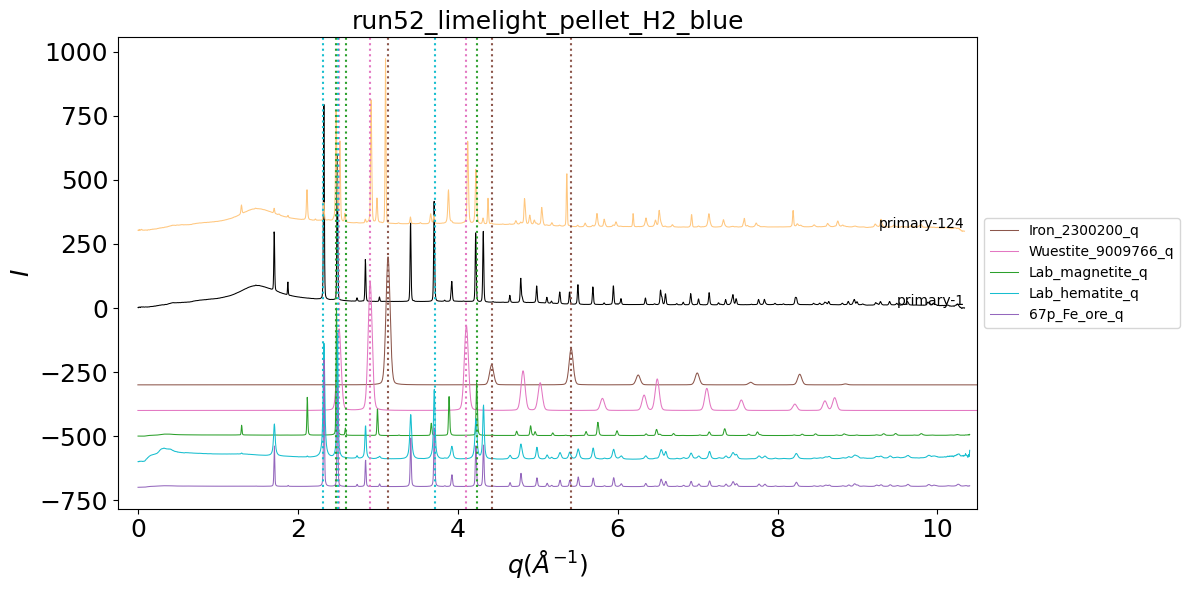

In [ ]:
#@title Summary waterfall plot for in-situ scans
#for run in ['run49','run50','run51', 'run52', 'run53', 'run54', 'run55', 'run56', 'run57', 'run58', 'run59']:
#for run in ['run60','run61', 'run62', 'run63', 'run64', 'run65']:
for run in ['run52']:

    ###################### parsing the filename
    tiffdir = os.path.join(userdir, 'tiff_base')
    # print(userdir, tiffdir)
    runslist = glob.glob(tiffdir + '/*')
    # print(runslist)
    runsdict = {}
    for run_item in runslist:
        run_number = os.path.basename(run_item).split('_')[0]
        runsdict[run_number] = run_item
    # print(runsdict)

    file_pattern = os.path.join(runsdict[run], 'integration', '*_mean_tth.chi')
    expname = os.path.basename(runsdict[run])
    # print(file_pattern)
    filelist = glob.glob(file_pattern)
    # print(filelist)
    filedict = {}
    for filename in filelist:
        file_parse = os.path.basename(filename).split('_')
        if not ('ss' in file_parse or 'stg2' in file_parse):
            file_number = file_parse[-3] # this takes the primary number
            filedict[file_number] = filename
            # ntimestamps = 13
        # else:
        #     file_number = file_parse[-3]
        #     filedict[file_number] = filename
        # print(file_number, filename)

    ################# grab ntimestamps curves (equally spacing in time)
    if get_timestamps:
        timestamps = ['primary-%d'%k for k in np.linspace(1, len(filedict)-1, ntimestamps).astype(int)]

    ################# plotting setting
    figsize = (12, 6)
    fs = 18
    fig, ax = plt.subplots(figsize=figsize, tight_layout=True) #this is key for "hold on"!!!!

    num_of_lines = len(timestamps)
    lincol_gradient = iter(cm.copper(np.linspace(0,1,num_of_lines))) #Wistia, copper, and autumn are nice gradients
    counting = 0
    ################ plotting selected timestamps
    for iv, timestamp in enumerate(timestamps):
        filename = filedict[timestamp]
        print('Loading file', filename)
        rawdata = np.loadtxt(filename)
        tth = rawdata[:, 0]
        d = 0.5*wavelength/np.sin(np.radians(tth/2)) #Bragg's law in angrstrom
        q = 2*np.pi/d
        I = rawdata[:, 1]
        I = I + iv * 300
        #I = I + iv * 100 #iv is basically the index number for the scan. this makes a waterfall plot
        # I = I/I.max() + 0.25 * iv
        #ax.plot(d, I, label=timestamp, color = lincol_wf, linewidth = lw)
        #ax.plot(d, I, color = lincol_wf, linewidth = lw)


        c=next(lincol_gradient)
        ax.plot(q, I, color = c, linewidth = lw)
        #ax.plot(tth, I, label=timestamp) #####
        #ax.text(d[-1], I[-1], timestamp, ha='right', va='bottom')
        ax.text(q[-1], I[-1], timestamp, ha='right', va='bottom')
        #ax.text(tth[-1], I[-1], timestamp, ha='left', va='bottom') #####

        counting = counting + 1

    ######### load multiple reference files, Yifan, 2024/4/12
    #ref_phases = ['SU_55Fe_S3_20231113-123848_ffaed2_primary-1_mean_q','SU_Lmag_S1_20231113-123625_d9ddff_primary-1_mean_q','SU_Lhem_S2_20231113-123737_848648_primary-1_mean_q','SU_67p1Fe_S6_20231113-124225_d3d593_primary-1_mean_q']
    #ref_phases = ['Iron_2300200', 'Wuestite_9009766','Magnetite_1528612','Hematite_1011240']
    ref_phases = ['Iron_2300200_q', 'Wuestite_9009766_q','Lab_magnetite_q','Lab_hematite_q','67p_Fe_ore_q']
    #ref_phases = ['Iron_2300200', 'Wuestite_9009766','Magnetite_1528612','Hematite_1011240','Maghemite_9006316']
    #color_ref_phases = [lincol_fe, lincol_m, lincol_h, lincol_h_ore] #setting the line colors for the reference files. these are predetermined in the previous code cell
    #color_ref_phases = [lincol_fe, lincol_w, lincol_m, lincol_h]
    color_ref_phases = [lincol_fe, lincol_w, lincol_m, lincol_h, lincol_h_ore]
    ref_shift_y = -100
    for i_phase, ref_phase in enumerate(ref_phases):
        reffile = os.path.join(userdir, 'userScripts', 'xrd_profiles', ref_phase + '.txt')
        refdata = np.loadtxt(reffile)
        #tth_ref = refdata[:, 0]
        q_ref = refdata[:, 0]
        #d_ref = 0.5*wavelength/np.sin(np.radians(tth_ref/2)) #convert to d-spacing
        #q_ref = 2*np.pi/d_ref
        I_ref = (refdata[:, 1] - refdata[0, 1]) #"grounding" the data
        sensitivity = 500 #the larger the value, the more prominent the peaks
        I_ref = I_ref/(I_ref.max()/sensitivity)  + ref_shift_y*(i_phase + 1) -200
        #ax.plot(d_ref, I_ref, label= ref_phase, linewidth= lw, color= color_ref_phases[i_phase])
        ax.plot(q_ref, I_ref, label= ref_phase, linewidth= lw, color= color_ref_phases[i_phase])
        #ax.plot(tth_ref, I_ref, label= ref_phase) #####
        #ax.plot(tth_ref, I_ref, label='Ref_' + ref_phase)
        #ax.text(tth_ref[-1], I_ref[-1], ref_phase, ha='left', va='bottom')

    #xlim_left, xlim_right = 0.5, 6 #for d
    #xlim_left, xlim_right = -0.25, 20 #for tth #####
    xlim_left, xlim_right = -0.25, 10.5 #for q
    ax.set_xlim(xlim_left, xlim_right)
    ######## put the legend outside of the box, Yifan, 20240422 ############
    # ax.legend(loc='lower right')
    ax.legend(loc='center left', bbox_to_anchor=[1, 0.5])
    ########################################################################
    #ax.set_xlabel(r'$d  ({\AA})$', fontsize=fs)
    ax.set_xlabel(r'$q  ({\AA}^{-1})$', fontsize=fs)
    #ax.set_xlabel(r'$2\theta (\degree)$', fontsize=fs) #####
    ax.set_ylabel(r'$I$', fontsize=fs)
    ax.set_title(expname, fontsize=fs)
    ax.tick_params(labelsize=fs)
    #ax.set_yticklabels([]) #turns off tick labels for vertical axis

################# plot vertical lines for the reference phase peaks
    for i_vert_line in ref_q_fe: #plot the vertical lines
    #for i_vert_line in ref_tth_fe:
        plt.axvline(x=i_vert_line, linestyle='dotted', color=lincol_fe)

    for i_vert_line in ref_q_w:
            plt.axvline(x=i_vert_line, linestyle='dotted', color=lincol_w)

    for i_vert_line in ref_q_m:
            plt.axvline(x=i_vert_line, linestyle='dotted', color=lincol_m)

    for i_vert_line in ref_q_h:
            plt.axvline(x=i_vert_line, linestyle='dotted', color=lincol_h)

 ########## save settings
    if response == "y":
      print("Saving the file...!")
      fname_typ = 'wf_'+ xrd_type + '_' + expname + '.png' #wf = waterfall
      save_loc = os.path.join(userdir, 'userAnalysis' + '/' + 'waterfallPlots'+ '/')
      if not os.path.isdir(save_loc):
          os.makedirs(save_loc)
      plt.savefig(save_loc + fname_typ)
    elif response == "n":
      print("Showing the plot without saving...")
      plt.show()
    else: print("Please enter yes or no.")

13
Loading file /content/drive/Shareddrives/leoradm_group/NSLS-II_202403/tiff_base/run60_hematite_pellet_vac_IR/integration/run60_hematite_pellet_vac_IR_20240328-212408_a4566e_ss_stg2_y_25,80mm_primary-1_mean_tth.chi
Loading file /content/drive/Shareddrives/leoradm_group/NSLS-II_202403/tiff_base/run60_hematite_pellet_vac_IR/integration/run60_hematite_pellet_vac_IR_20240328-212408_a4566e_ss_stg2_y_25,80mm_primary-1_mean_tth.chi
Loading file /content/drive/Shareddrives/leoradm_group/NSLS-II_202403/tiff_base/run60_hematite_pellet_vac_IR/integration/run60_hematite_pellet_vac_IR_20240328-212408_a4566e_ss_stg2_y_25,90mm_primary-2_mean_tth.chi
Loading file /content/drive/Shareddrives/leoradm_group/NSLS-II_202403/tiff_base/run60_hematite_pellet_vac_IR/integration/run60_hematite_pellet_vac_IR_20240328-212408_a4566e_ss_stg2_y_26,00mm_primary-3_mean_tth.chi
Loading file /content/drive/Shareddrives/leoradm_group/NSLS-II_202403/tiff_base/run60_hematite_pellet_vac_IR/integration/run60_hematite_pelle

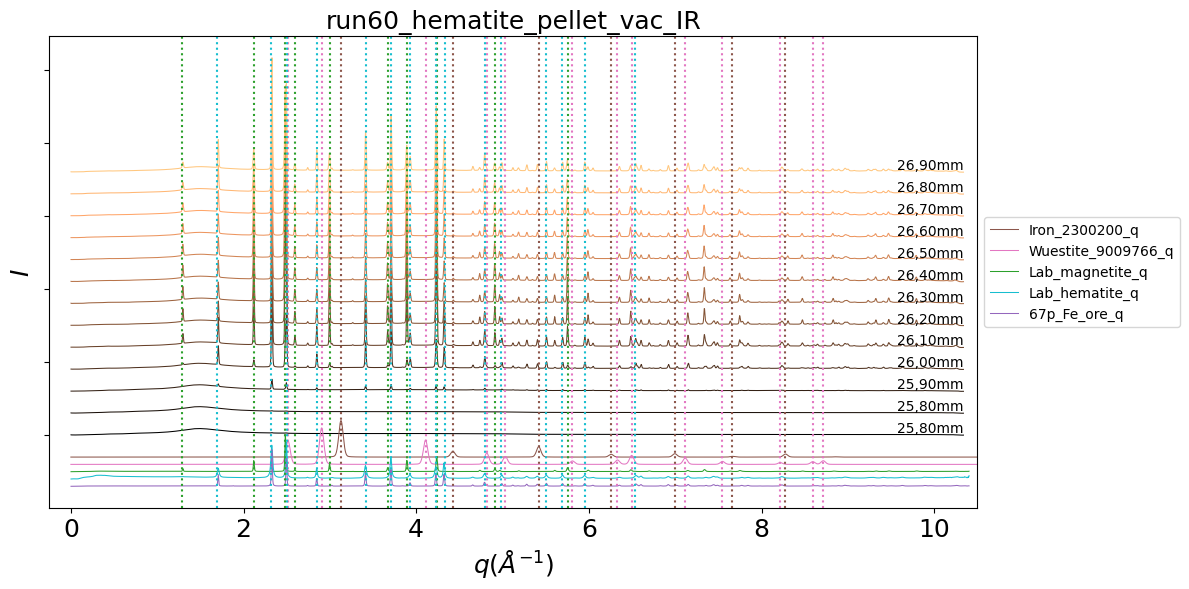

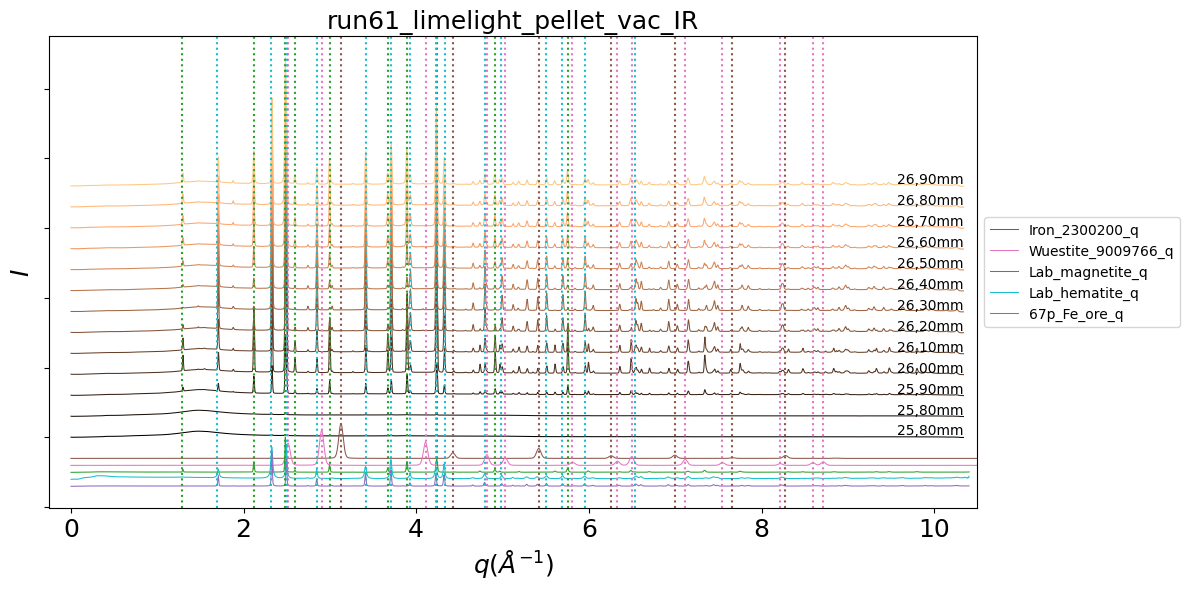

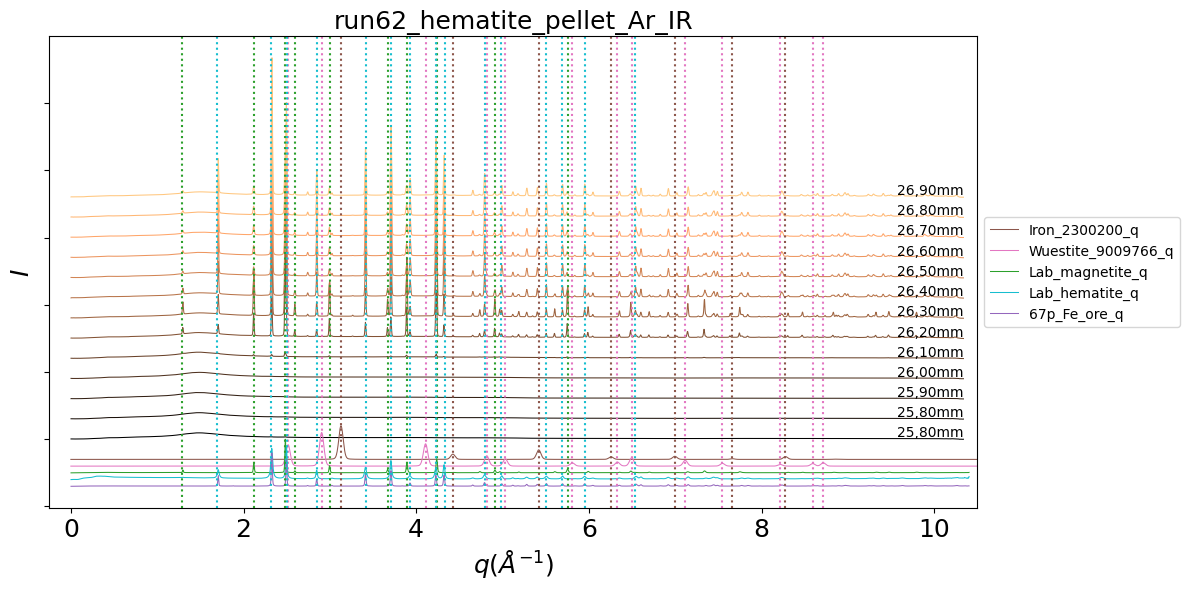

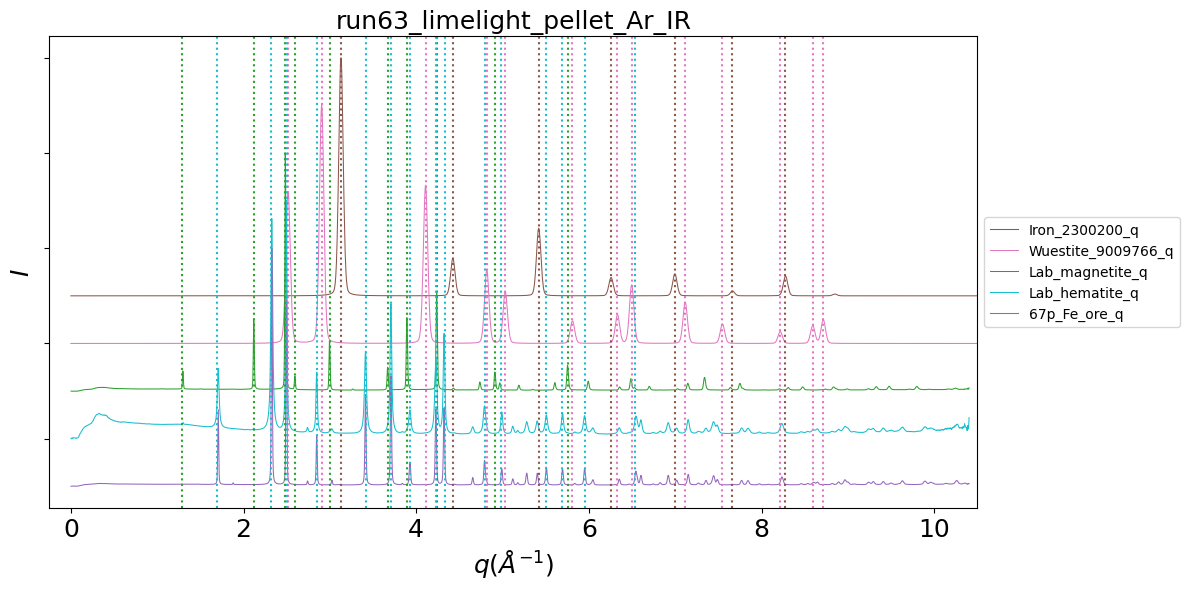

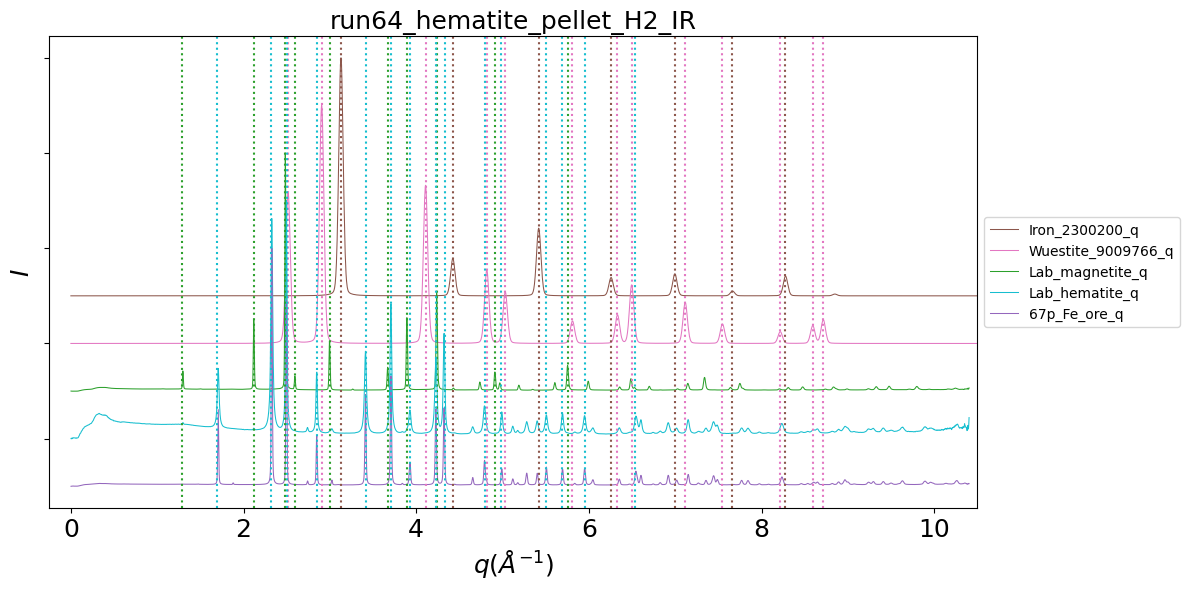

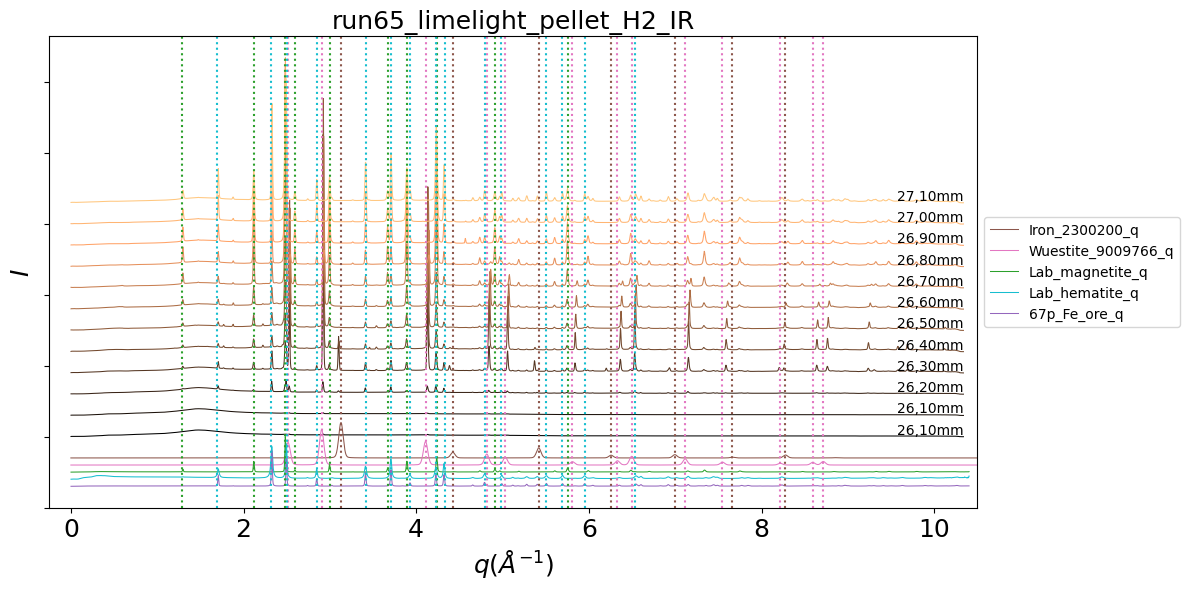

In [ ]:
#@title Summary waterfall plot for depth scan series

#for run in ['run49','run50','run51', 'run52', 'run53', 'run54', 'run55', 'run56', 'run57', 'run58', 'run59']:
for run in ['run60','run61', 'run62', 'run63', 'run64', 'run65']:
#for run in ['run51']:

    ###################### parsing the filename
    tiffdir = os.path.join(userdir, 'tiff_base')
    # print(userdir, tiffdir)
    runslist = glob.glob(tiffdir + '/*')
    # print(runslist)
    runsdict = {}
    for run_item in runslist:
        run_number = os.path.basename(run_item).split('_')[0]
        runsdict[run_number] = run_item

    file_pattern = os.path.join(runsdict[run], 'integration', '*_mean_tth.chi')
    expname = os.path.basename(runsdict[run])
    # print(file_pattern)
    filelist = glob.glob(file_pattern)
    # print(filelist)
    filedict = {}
    count = 0 #counts number of files that satisfy the following condition
    for filename in filelist: #selects for ystg files
        file_parse = os.path.basename(filename).split('_')
        if ('ss' in file_parse or 'stg2' in file_parse): #select for y scans
            file_number = file_parse[-3] # this takes the primary number
            filedict[file_number] = filename
            count = count + 1
        # else:
        #     file_number = file_parse[-3]
        #     filedict[file_number] = filename
        # print(file_number, filename)
    print(count)
    ################# grab nxxxxstamps curves (equally spacing in xxxx)
    if get_timestamps:
        depthstamps = ['primary-%d'%k for k in np.linspace(1, len(filedict)-1, count).astype(int)]

    ################# plotting setting
    figsize = (12, 6)
    fs = 18
    fig, ax = plt.subplots(figsize=figsize, tight_layout=True)

    num_of_lines = len(depthstamps)
    lincol_gradient = iter(cm.copper(np.linspace(0,1,num_of_lines))) #Wistia, copper, and autumn are nice gradients
    counting = 0
    ################ plotting selected depthstamps
    for iv, depthstamp in enumerate(depthstamps):
        filename = filedict[depthstamp]
        print('Loading file', filename)
        ############################# Extract depth ############################
        splitfile = filename.split('_')
        depth_str = splitfile[-4]          # depth value
        ########################################################################
        rawdata = np.loadtxt(filename)
        tth = rawdata[:, 0]
        d = 0.5*wavelength/np.sin(np.radians(tth/2)) #Bragg's law in angrstrom
        q = 2*np.pi/d
        I = rawdata[:, 1]
        I = I + iv * 300
        #I = I + iv * 100 #iv is basically the index number for the scan. this makes a waterfall plot
        # I = I/I.max() + 0.25 * iv
        ################### label by depth ###############################
        c=next(lincol_gradient)
        #ax.plot(d, I, label='ss_stg2_y_' + depth_str, color=lincol_wf)
        ax.plot(q, I, color=c, linewidth= lw)
        ax.text(q[-1], I[-1], depth_str, ha='right', va='bottom')
        ##### for tth too
        #ax.text(tth[-1], I[-1], depth_str, ha='left', va='bottom') #####
        ##################################################################
        counting = counting + 1


    ######### Changed to load multiple reference files, Yifan, 2024/4/12
    ref_shift_y = -100
    for i_phase, ref_phase in enumerate(ref_phases):
        reffile = os.path.join(userdir, 'userScripts', 'xrd_profiles', ref_phase + '.txt')
        refdata = np.loadtxt(reffile)
        q_ref = refdata[:, 0]
        I_ref = (refdata[:, 1] - refdata[0, 1]) #"grounding" the data

        sensitivity = 500 #the larger the value, the more prominent the peaks
        I_ref = I_ref/(I_ref.max()/sensitivity)  + ref_shift_y*(i_phase + 1) -200
        ax.plot(q_ref, I_ref, label= ref_phase, linewidth= lw, color= color_ref_phases[i_phase])
        #ax.plot(tth_ref, I_ref, label= ref_phase) #####
        #ax.plot(tth_ref, I_ref, label='Ref_' + ref_phase)
        #ax.text(tth_ref[-1], I_ref[-1], ref_phase, ha='left', va='bottom')

    xlim_left, xlim_right = -0.25, 10.5 #for q
    ax.set_xlim(xlim_left, xlim_right)
    # ax.legend(loc='lower right')
    ax.legend(loc='center left', bbox_to_anchor=[1, 0.5])
    ax.set_xlabel(r'$q  ({\AA}^{-1})$', fontsize=fs)
    #ax.set_xlabel(r'$2\theta (\degree)$', fontsize=fs) #####
    ax.set_ylabel(r'$I$', fontsize=fs)
    ax.set_title(expname, fontsize=fs)
    ax.tick_params(labelsize=fs)
    ax.set_yticklabels([]) #turns off tick labels for vertical axis


################# plot vertical lines for the reference phase peaks

    #define the lines you want to plot for each phase
    for i_vert_line in ref_q_fe: #plot the vertical lines
    #for i_vert_line in ref_tth_fe:
        plt.axvline(x=i_vert_line, linestyle='dotted', color=lincol_fe)

    for i_vert_line in ref_q_w:
        plt.axvline(x=i_vert_line, linestyle='dotted', color=lincol_w)

    for i_vert_line in ref_q_m:
            plt.axvline(x=i_vert_line, linestyle='dotted', color=lincol_m)

    for i_vert_line in ref_q_h:
            plt.axvline(x=i_vert_line, linestyle='dotted', color=lincol_h)

 ##########
    if response == "y":
      print("Saving the file...!")
      fname_typ = 'ds_'+ xrd_type + '_' + expname + '.png' #ds = depth scan
      save_loc = os.path.join(userdir, 'userAnalysis' + '/' + 'depthScanPlots'+ '/')
      if not os.path.isdir(save_loc):
          os.makedirs(save_loc)
      plt.savefig(save_loc + fname_typ)
    elif response == "n":
      print("Showing the plot without saving...")
      plt.show()
    else: print("Please enter yes or no.")

/content/drive/Shareddrives/leoradm_group/NSLS-II_202403/tiff_base/sample_67_20240328_231714.xlsx
Saving the file...!


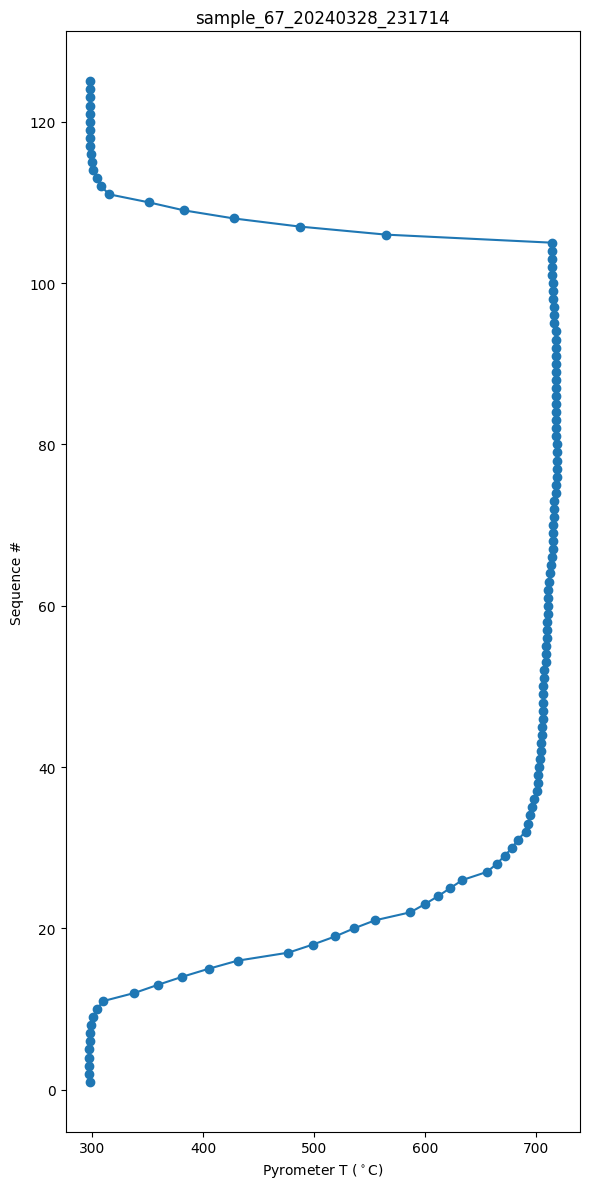

In [ ]:
# @title Plotting the pyrometer data: scan # vs T
#Yifan pls make help me automate this later
import pandas as pd

path = os.path.join(userdir, 'tiff_base')
fn = 'sample_67_20240328_231714' ### file name that you want to plot
fp = os.path.join(path, fn + '.xlsx')
print(fp)
pyrom_data = pd.read_excel(fp)
y_axis = pyrom_data['seq_num']
x_axis = pyrom_data['eurotherm_temperature']
#labels = ['seq_num', 'time', 'pe2_image', 'pe2_stats1_total', 'ss_stg2_y', 'ss_stg2_y_user_setpoint', 'eurotherm_temperature', 'uid6']

#figsize = (6, 12)
fs = 18
fig, ax = plt.subplots(figsize=figsize, tight_layout=True)

#plt.scatter(x_axis, y_axis)
plt.plot(x_axis, y_axis, '-o')
plt.xlabel("Pyrometer T ($^\circ$C)")
plt.ylabel("Scan #")
plt.title(fn)

response = 'n' #######################################
#save to folder
if response == "y":
    print("Saving the file...!")
    fname_typ = fn + '.png' #ds = depth scan
    save_loc = os.path.join(userdir, 'userAnalysis', 'pyrometerPlots')
    # if not os.path.isdir(save_loc):
    os.makedirs(save_loc, exist_ok=True)
    plt.savefig(os.path.join(save_loc, fname_typ))
elif response == "n":
    print("Showing the plot without saving...")
    plt.show()
else: print("Please enter yes or no.")

/content/drive/Shareddrives/leoradm_group/NSLS-II_202403/tiff_base/sample_57_20240328_192424.xlsx
Showing the plot without saving...


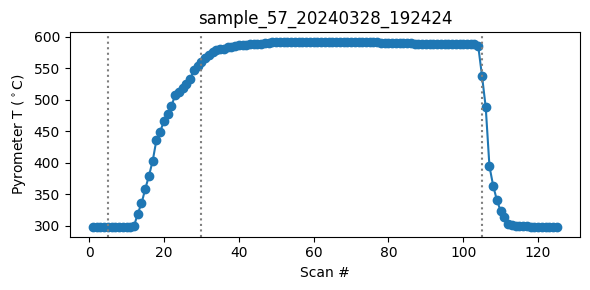

In [5]:
# @title Plotting the pyrometer data: T vs scan #, 5/16/24
import pandas as pd

#laser = [7, 32, 107] #run51
#laser = [4, 29, 104] #run52
#laser = [6, 31, 106] #run53
#laser = [3, 28, 103] #run54
laser = [5, 30, 105] #run 56 sample_57_20240328_192424
#laser = [0, 25, 100] #run60
#laser = [7, 32, 107] #run62
#laser = [5, 30, 105] #run64
#laser = [4, 29, 104] #run65

path = os.path.join(userdir, 'tiff_base')
fn = 'sample_57_20240328_192424' ### file name that you want to plot
fp = os.path.join(path, fn + '.xlsx')
print(fp)
pyrom_data = pd.read_excel(fp)
x_axis = pyrom_data['seq_num']
y_axis = pyrom_data['eurotherm_temperature']

figsize = (6, 3)
fs = 18
fig, ax = plt.subplots(figsize=figsize, tight_layout=True)
laserls = 'dotted'
lasercol = 'tab:gray'

#plt.scatter(x_axis, y_axis)
plt.plot(x_axis, y_axis, '-o')
plt.ylabel("Pyrometer T ($^\circ$C)")
plt.xlabel("Scan #")
plt.title(fn)

for i in laser:
    #print('i = ', i)
    plt.axvline(x=i, linestyle=laserls, color=lasercol)

response = 'n' #######################################
#save to folder
if response == "y":
    print("Saving the file...!")
    fname_typ = fn + '.png' #ds = depth scan
    save_loc = os.path.join(userdir, 'userAnalysis', 'pyrometerPlots')
    # if not os.path.isdir(save_loc):
    os.makedirs(save_loc, exist_ok=True)
    plt.savefig(os.path.join(save_loc, fname_typ))
elif response == "n":
    print("Showing the plot without saving...")
    plt.show()
else: print("Please enter yes or no.")

/content/drive/Shareddrives/leoradm_group/NSLS-II_202403/laser_programs_and_logs/LOG-Mar.28.2024-03.16.01_run49.csv
{'FileType:PSCS_Data_Log': 'Description:run49_blue_rampup_longhold'}
{'FileType:PSCS_Data_Log': 'StartTime:Mar 28', None: [' 2024 3:13:11 PM']}
{'FileType:PSCS_Data_Log': 'Sampling:1S'}
{'FileType:PSCS_Data_Log': 'Record:ID', None: ['Voltage(mV)', 'Current(mA)']}
{'FileType:PSCS_Data_Log': 'Rec:0', None: ['750', '0']}
{'FileType:PSCS_Data_Log': 'Rec:1', None: ['750', '0']}
{'FileType:PSCS_Data_Log': 'Rec:2', None: ['750', '0']}
{'FileType:PSCS_Data_Log': 'Rec:3', None: ['750', '0']}
{'FileType:PSCS_Data_Log': 'Rec:4', None: ['750', '0']}
{'FileType:PSCS_Data_Log': 'Rec:5', None: ['750', '0']}
{'FileType:PSCS_Data_Log': 'Rec:6', None: ['750', '0']}
{'FileType:PSCS_Data_Log': 'Rec:7', None: ['750', '0']}
{'FileType:PSCS_Data_Log': 'Rec:8', None: ['750', '0']}
{'FileType:PSCS_Data_Log': 'Rec:9', None: ['750', '0']}
{'FileType:PSCS_Data_Log': 'Rec:10', None: ['1890', '90']}
{

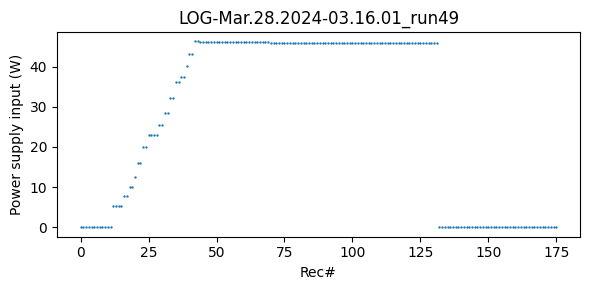

In [55]:
# @title Plotting the laser control log: P vs time

import pandas as pd
import csv

response = "y"

path = os.path.join(userdir, 'laser_programs_and_logs')
fn = 'LOG-Mar.28.2024-03.16.01_run49' ### file name that you want to plot
fp = os.path.join(path, fn + '.csv')
print(fp)
markersz = 2
lw = 2

laser_log_data = []
with open(fp, mode = 'r')as file:
    csvFile = csv.DictReader(file)
    for lines in csvFile:
        print(lines)
        laser_log_data.append(lines) #extract data from the file for python treatment
print()
print('here are the table headings: ', laser_log_data[3])
i = 4
print('say the row we want to look at in the doc is i = ', i)
print('...here is the record number: ', laser_log_data[i]['FileType:PSCS_Data_Log'])
print('and in num form hopefully: ', laser_log_data[i]['FileType:PSCS_Data_Log'].split(':')[-1])
print('...and here is are the voltage and currents: ', laser_log_data[i][None])
print("heres the voltage in V: ", int(laser_log_data[i][None][0]) / 1000, " and heres the current in A: ", int(laser_log_data[i][None][1]) / 1000)

runnum = []
volt = []
current = []
count = 0
for lines in laser_log_data:
    if count >= 4:
        runnum.append(int(laser_log_data[count]['FileType:PSCS_Data_Log'].split(':')[-1]))
        volt.append(int(laser_log_data[count][None][0]) / 1000) #in V
        current.append(int(laser_log_data[count][None][1]) / 1000) #in A
    elif count < 4:
        print('no its not')
    count = count + 1

print('runnum = ', runnum)
print('volt = ', volt)
print('current = ', current)

x_axis = runnum
#y_axis = volt*current
y_axis = np.multiply(volt, current)
print(y_axis)

figsize = (6, 3)
fs = 18
fig, ax = plt.subplots(figsize=figsize, tight_layout=True)
laserls = 'dotted'
lasercol = 'tab:gray'

plt.scatter(x_axis, y_axis, marker = '.', s=markersz)
#plt.plot(x_axis, y_axis, linewidth = lw)
plt.ylabel("Power supply input (W)")
plt.xlabel("Rec#")
plt.title(fn)

'''
for i in laser:
    #print('i = ', i)
    plt.axvline(x=i, linestyle=laserls, color=lasercol)
'''

response = 'n' #######################################
#save to folder
if response == "y":
    print("Saving the file...!")
    fname_typ = fn + '.png' #ds = depth scan
    save_loc = os.path.join(userdir, 'userAnalysis', 'laserPlots')
    # if not os.path.isdir(save_loc):
    os.makedirs(save_loc, exist_ok=True)
    plt.savefig(os.path.join(save_loc, fname_typ))
elif response == "n":
    print("Showing the plot without saving...")
    plt.show()
else: print("Please enter yes or no.")

### Generating laser power plot

Start time: 2023-12-14 20:21:54-08:00 delta t: 3

Timestamp from BNL: 2023-12-14 23:43:16.100371-05:00


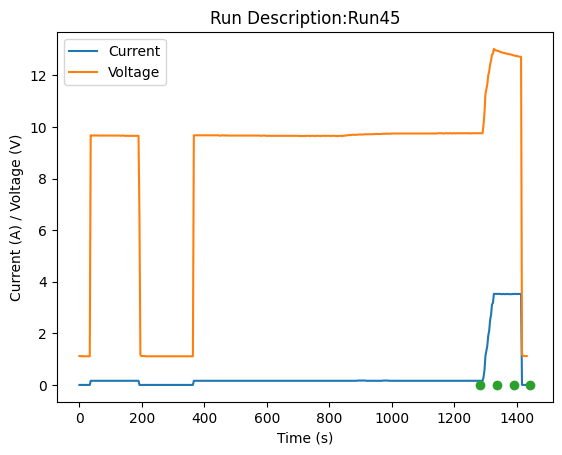

In [ ]:
### generating laser plot figure
import time
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser
from datetime import timedelta, timezone

userdir = "/content/drive/Shareddrives/leoradm_group/NSLS-II_202312"
scriptdir = os.path.join(userdir, 'userScripts')
logfile = os.path.join(scriptdir, 'logfiles/LOG-Dec.14.2023-08.45.38_Run45.csv') ##### Run45 is in PST!
with open(logfile, 'r') as f:
    line = f.readline()
    data = []
    while line != '':
        line_tag = line.split(':')[0]
        if line_tag == 'Description':
            run_number = line.split()[-1]
        elif line_tag == 'StartTime':
            # start_time = parser.parse(':'.join(line.split(':')[1:]) + ' EST', tzinfos={'EST': timezone(-timedelta(hours=5))}) ################## For runs before 45
            start_time = parser.parse(':'.join(line.split(':')[1:]) + ' PST', tzinfos={'PST': timezone(-timedelta(hours=8))})   ################## For run 45 and after
        elif line_tag == 'Sampling':
            delta_t = int(line.split(':')[1][:-2])
        elif line_tag == 'Record':
            head_str = line.split(':')[1].split(',')
        elif line_tag == 'Rec':
            data_str = line.split(':')[1].split(',')
            data_line = [int(k) for k in data_str]
            data.append(data_line)
        line = f.readline()

print('Start time:', start_time, 'delta t:', delta_t)
print('')

log_table = os.path.join(scriptdir, 'table_csv_2024/sample_hematite_blue_vac_run45_ef4fe4_20240105_215121.csv') #####
with open(log_table, 'r') as f:
    line = f.readline()
    header = line.split(',')
    sequence = []
    timetable = []
    line = f.readline()
    while line != '':
        sequence.append(int(line.split(',')[0]))
        time_str = line.split(',')[1]
        time_est = parser.parse(time_str).replace(tzinfo=timezone.utc).astimezone(tz=timezone(-timedelta(hours=5)))
        timetable.append(time_est)
        line = f.readline()
    sequence = np.array(sequence)

print('Timestamp from BNL:', timetable[0])

record_times = [(k - start_time).total_seconds() for k in timetable]
# print(timetable[0] - start_time)
# print(timetable[0], timetable[1], timetable[1] - timetable[0])
# print(np.array(data))
# print(head_str)
rawdata = np.array(data)
t = rawdata[:, 0] * delta_t
V = rawdata[:, 1]/1000
I = rawdata[:, 2]/1000
fig, ax = plt.subplots()
ax.plot(t, I, t, V)
#RT = np.array(record_times)[[0, 121, 242, 364]] ##### these points are for run39
RT = np.array(record_times)[[0, 120, 241, 362]] ##### these points are for run45 !!remember to subtract 1 from the runs for python's indexing
ax.plot(RT, np.zeros(RT.size), 'o')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current (A) / Voltage (V)')
ax.legend(['Current', 'Voltage'])
ax.set_title('Run %s' % run_number)
plt.show()

### Stitch three images in one plot

Loading file /content/drive/Shareddrives/leoradm_group/NSLS-II_202403/tiff_base/run65_limelight_pellet_H2_IR/integration/run65_limelight_pellet_H2_IR_20240328-231442_9f1ef6_primary-1_mean_tth.chi
Loading file /content/drive/Shareddrives/leoradm_group/NSLS-II_202403/tiff_base/run65_limelight_pellet_H2_IR/integration/run65_limelight_pellet_H2_IR_20240328-231442_9f1ef6_primary-31_mean_tth.chi
Loading file /content/drive/Shareddrives/leoradm_group/NSLS-II_202403/tiff_base/run65_limelight_pellet_H2_IR/integration/run65_limelight_pellet_H2_IR_20240328-231442_9f1ef6_primary-62_mean_tth.chi
Loading file /content/drive/Shareddrives/leoradm_group/NSLS-II_202403/tiff_base/run65_limelight_pellet_H2_IR/integration/run65_limelight_pellet_H2_IR_20240328-231442_9f1ef6_primary-93_mean_tth.chi
Loading file /content/drive/Shareddrives/leoradm_group/NSLS-II_202403/tiff_base/run65_limelight_pellet_H2_IR/integration/run65_limelight_pellet_H2_IR_20240328-231442_9f1ef6_primary-124_mean_tth.chi
Loading file /c

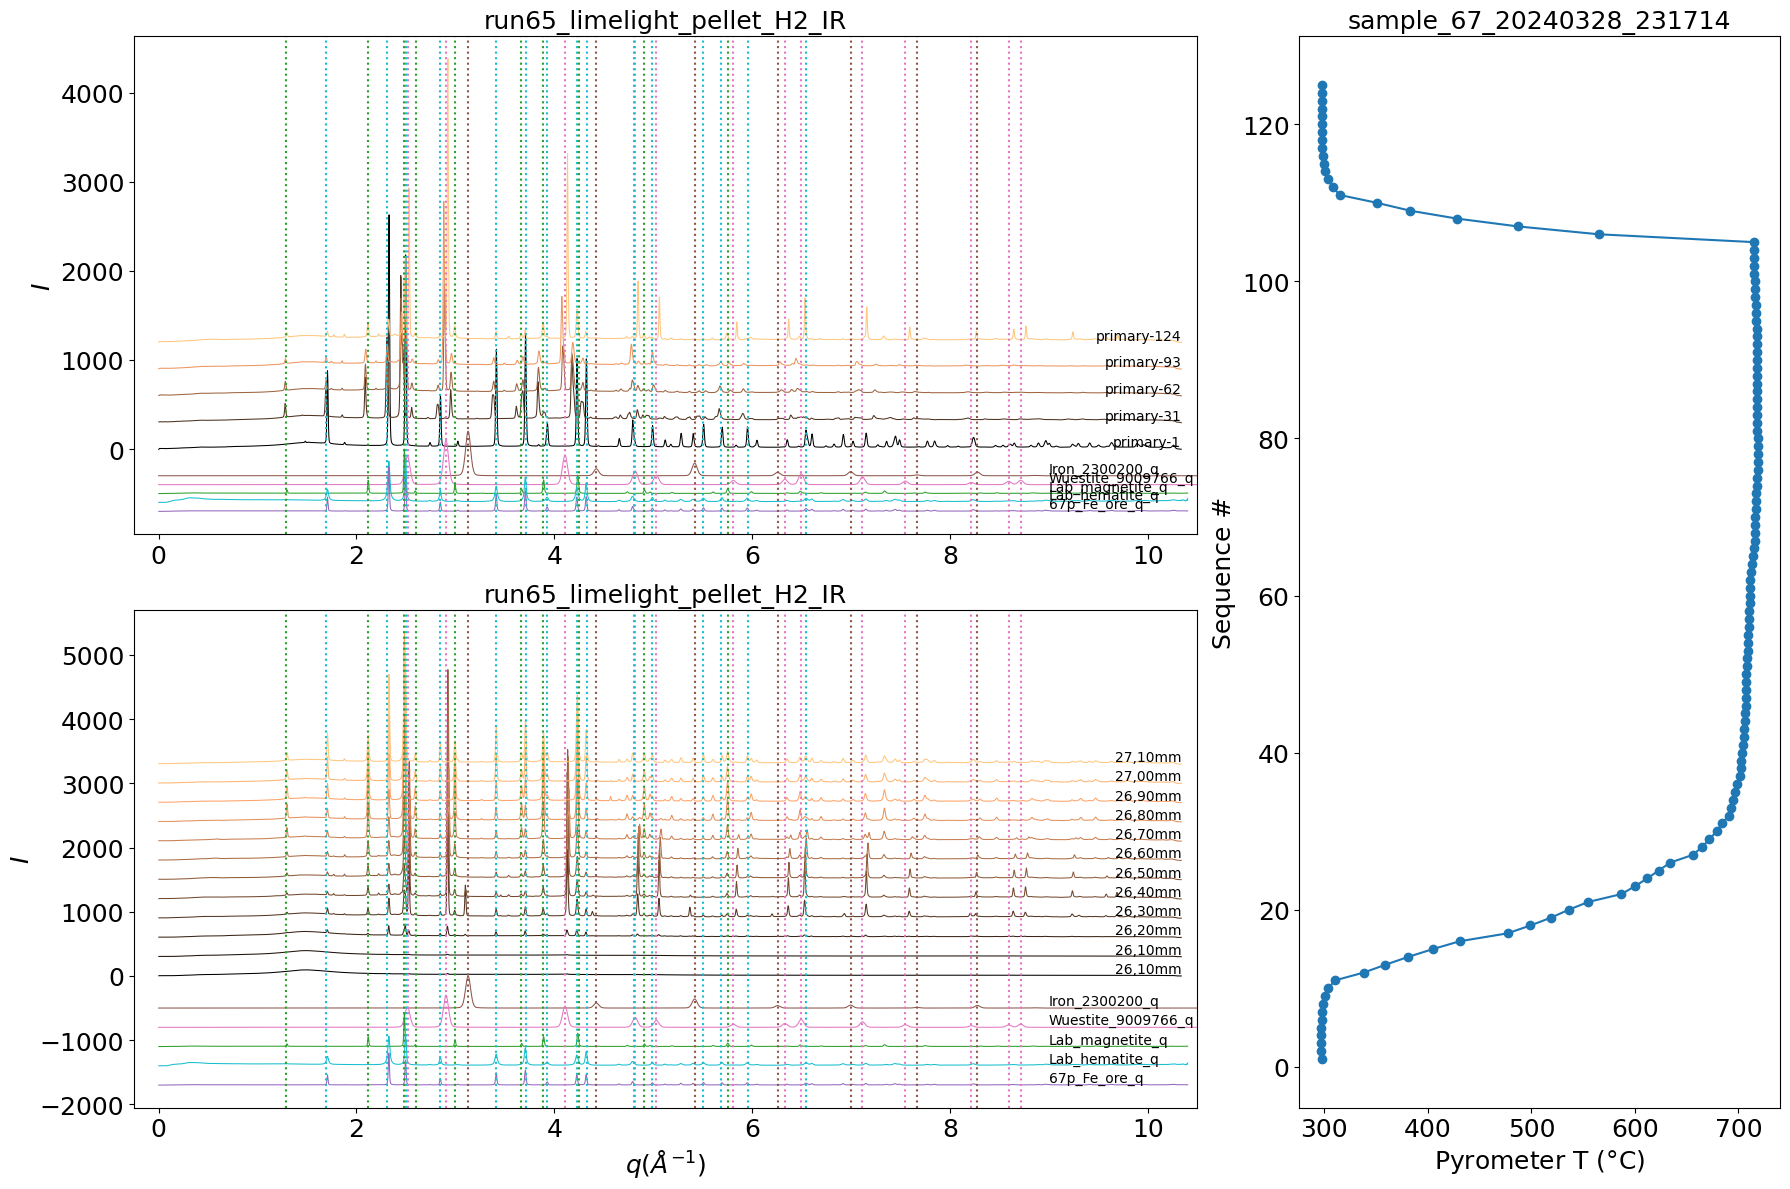

In [ ]:
# names for the samples
run_insitu = 'run65'
#run_depth  = 'run63'
run_depth = run_insitu
run_pyro  = 'sample_67_20240328_231714'

# configure the figures
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(18, 12), tight_layout=True)
gs = gridspec.GridSpec(2, 3, figure=fig)

# align axes to grids
ax1 = fig.add_subplot(gs[0, 0:2])     # in-situ
ax2 = fig.add_subplot(gs[1, 0:2], sharex=ax1)     # depth scan
ax3 = fig.add_subplot(gs[0:2, 2])     # pyrometer
fs = 18

# create waterfall plot for in-situ scans
ax = ax1
run = run_insitu
###################### parsing the filename
tiffdir = os.path.join(userdir, 'tiff_base')
runslist = glob.glob(tiffdir + '/*')
runsdict = {}
for run_item in runslist:
    run_number = os.path.basename(run_item).split('_')[0]
    runsdict[run_number] = run_item

file_pattern = os.path.join(runsdict[run], 'integration', '*_mean_tth.chi')
expname = os.path.basename(runsdict[run])
filelist = glob.glob(file_pattern)
filedict = {}
for filename in filelist:
    file_parse = os.path.basename(filename).split('_')
    if not ('ss' in file_parse or 'stg2' in file_parse):
        file_number = file_parse[-3] # this takes the primary number
        filedict[file_number] = filename

################# grab ntimestamps curves (equally spacing in time)
if get_timestamps:
    timestamps = ['primary-%d'%k for k in np.linspace(1, len(filedict)-1, ntimestamps).astype(int)]

################# plotting setting
num_of_lines = len(timestamps)
lincol_gradient = iter(cm.copper(np.linspace(0,1,num_of_lines))) #Wistia, copper, and autumn are nice gradients
counting = 0
################ plotting selected timestamps
for iv, timestamp in enumerate(timestamps):
    filename = filedict[timestamp]
    print('Loading file', filename)
    rawdata = np.loadtxt(filename)
    tth = rawdata[:, 0]
    d = 0.5*wavelength/np.sin(np.radians(tth/2)) #Bragg's law in angrstrom
    q = 2*np.pi/d
    I = rawdata[:, 1]
    I = I + iv * 300
    #I = I + iv * 100 #iv is basically the index number for the scan. this makes a waterfall plot

    c=next(lincol_gradient)
    ax.plot(q, I, color = c, linewidth = lw)
    #ax.plot(tth, I, label=timestamp) #####
    #ax.text(d[-1], I[-1], timestamp, ha='right', va='bottom')
    ax.text(q[-1], I[-1], timestamp, ha='right', va='bottom')
    #ax.text(tth[-1], I[-1], timestamp, ha='left', va='bottom') #####

    counting = counting + 1

######### load multiple reference files, Yifan, 2024/4/12
#ref_phases = ['Iron_2300200', 'Wuestite_9009766','Magnetite_1528612','Hematite_1011240']
ref_phases = ['Iron_2300200_q', 'Wuestite_9009766_q','Lab_magnetite_q','Lab_hematite_q','67p_Fe_ore_q']
color_ref_phases = [lincol_fe, lincol_w, lincol_m, lincol_h, lincol_h_ore]
ref_shift_y = -100
for i_phase, ref_phase in enumerate(ref_phases):
    reffile = os.path.join(userdir, 'userScripts', 'xrd_profiles', ref_phase + '.txt')
    refdata = np.loadtxt(reffile)
    #tth_ref = refdata[:, 0]
    q_ref = refdata[:, 0]
    #d_ref = 0.5*wavelength/np.sin(np.radians(tth_ref/2)) #convert to d-spacing
    #q_ref = 2*np.pi/d_ref
    I_ref = (refdata[:, 1] - refdata[0, 1]) #"grounding" the data
    sensitivity = 500 #the larger the value, the more prominent the peaks
    I_ref = I_ref/(I_ref.max()/sensitivity)  + ref_shift_y*(i_phase + 1) -200
    ax.plot(q_ref, I_ref, label= ref_phase, linewidth= lw, color= color_ref_phases[i_phase])

    ax.text(9, I_ref.min(), ref_phase, ha='left', va='bottom')

xlim_left, xlim_right = -0.25, 10.5 #for q
ax.set_xlim(xlim_left, xlim_right)
######## put the legend outside of the box, Yifan, 20240422 ############
# ax.legend(loc='lower right')
# ax.legend(loc='center left', bbox_to_anchor=[1, 0.5])
########################################################################
ax.set_ylabel(r'$I$', fontsize=fs)
ax.set_title(expname, fontsize=fs)
ax.tick_params(labelsize=fs)
# ax.set_xticklabels([])
#ax.set_yticklabels([]) #turns off tick labels for vertical axis

################# plot vertical lines for the reference phase peaks
for i_vert_line in ref_q_fe: #plot the vertical lines
#for i_vert_line in ref_tth_fe:
    ax.axvline(x=i_vert_line, linestyle='dotted', color=lincol_fe)

for i_vert_line in ref_q_w:
    ax.axvline(x=i_vert_line, linestyle='dotted', color=lincol_w)

for i_vert_line in ref_q_m:
    ax.axvline(x=i_vert_line, linestyle='dotted', color=lincol_m)

for i_vert_line in ref_q_h:
    ax.axvline(x=i_vert_line, linestyle='dotted', color=lincol_h)

#################### end of the insitu plotting #######################

#################### start of the depth scan   ########################
run = run_depth
ax = ax2
###################### parsing the filename
tiffdir = os.path.join(userdir, 'tiff_base')
runslist = glob.glob(tiffdir + '/*')
runsdict = {}
for run_item in runslist:
    run_number = os.path.basename(run_item).split('_')[0]
    runsdict[run_number] = run_item

file_pattern = os.path.join(runsdict[run], 'integration', '*_mean_tth.chi')
expname = os.path.basename(runsdict[run])
filelist = glob.glob(file_pattern)
filedict = {}
count = 0 #counts number of files that satisfy the following condition
for filename in filelist: #selects for ystg files
    file_parse = os.path.basename(filename).split('_')
    if ('ss' in file_parse or 'stg2' in file_parse): #select for y scans
        file_number = file_parse[-3] # this takes the primary number
        filedict[file_number] = filename
        count = count + 1

################# grab nxxxxstamps curves (equally spacing in xxxx)
if get_timestamps:
    depthstamps = ['primary-%d'%k for k in np.linspace(1, len(filedict)-1, count).astype(int)]

################# plotting setting

num_of_lines = len(depthstamps)
lincol_gradient = iter(cm.copper(np.linspace(0,1,num_of_lines))) #Wistia, copper, and autumn are nice gradients
counting = 0
################ plotting selected depthstamps
for iv, depthstamp in enumerate(depthstamps):
    filename = filedict[depthstamp]
    print('Loading file', filename)
    ############################# Extract depth ############################
    splitfile = filename.split('_')
    depth_str = splitfile[-4]          # depth value
    ########################################################################
    rawdata = np.loadtxt(filename)
    tth = rawdata[:, 0]
    d = 0.5*wavelength/np.sin(np.radians(tth/2)) #Bragg's law in angrstrom
    q = 2*np.pi/d
    I = rawdata[:, 1]
    I = I + iv * 300
    ################### label by depth ###############################
    c=next(lincol_gradient)
    #ax.plot(d, I, label='ss_stg2_y_' + depth_str, color=lincol_wf)
    ax.plot(q, I, color=c, linewidth= lw)
    ax.text(q[-1], I[-1], depth_str, ha='right', va='bottom')
    ##### for tth too
    #ax.text(tth[-1], I[-1], depth_str, ha='left', va='bottom') #####
    ##################################################################
    counting = counting + 1

######### Changed to load multiple reference files, Yifan, 2024/4/12
ref_shift_y = -300
for i_phase, ref_phase in enumerate(ref_phases):
    reffile = os.path.join(userdir, 'userScripts', 'xrd_profiles', ref_phase + '.txt')
    refdata = np.loadtxt(reffile)
    q_ref = refdata[:, 0]
    I_ref = (refdata[:, 1] - refdata[0, 1]) #"grounding" the data

    sensitivity = 500 #the larger the value, the more prominent the peaks
    I_ref = I_ref/(I_ref.max()/sensitivity)  + ref_shift_y*(i_phase + 1) -200
    ax.plot(q_ref, I_ref, label= ref_phase, linewidth= lw, color= color_ref_phases[i_phase])
    #ax.plot(tth_ref, I_ref, label= ref_phase) #####
    #ax.plot(tth_ref, I_ref, label='Ref_' + ref_phase)
    ################# put the label aside the curve, Yifan, 20240422
    ax.text(9, I_ref.min(), ref_phase, ha='left', va='bottom')

xlim_left, xlim_right = -0.25, 10.5 #for q
ax.set_xlim(xlim_left, xlim_right)
# ax.legend(loc='lower right')
# ax.legend(loc='center left', bbox_to_anchor=[1, 0.5])
ax.set_xlabel(r'$q  ({\AA}^{-1})$', fontsize=fs)
#ax.set_xlabel(r'$2\theta (\degree)$', fontsize=fs) #####
ax.set_ylabel(r'$I$', fontsize=fs)
ax.set_title(expname, fontsize=fs)
ax.tick_params(labelsize=fs)
# ax.set_yticklabels([]) #turns off tick labels for vertical axis

################# plot vertical lines for the reference phase peaks

#define the lines you want to plot for each phase
for i_vert_line in ref_q_fe: #plot the vertical lines
    ax.axvline(x=i_vert_line, linestyle='dotted', color=lincol_fe)

for i_vert_line in ref_q_w:
    ax.axvline(x=i_vert_line, linestyle='dotted', color=lincol_w)

for i_vert_line in ref_q_m:
    ax.axvline(x=i_vert_line, linestyle='dotted', color=lincol_m)

for i_vert_line in ref_q_h:
    ax.axvline(x=i_vert_line, linestyle='dotted', color=lincol_h)

#################### end of the depth scan #########################

#################### start of the pyrometer ########################
import pandas as pd
ax = ax3

path = tiffdir
fn = run_pyro ### file name that you want to plot
fp = os.path.join(path, fn + '.xlsx')
# print(fp)
pyrom_data = pd.read_excel(fp)
y_axis = pyrom_data['seq_num']
x_axis = pyrom_data['eurotherm_temperature']
# labels = ['seq_num', 'time', 'pe2_image', 'pe2_stats1_total', 'ss_stg2_y', 'ss_stg2_y_user_setpoint', 'eurotherm_temperature', 'uid6']

ax.plot(x_axis, y_axis, '-o')
ax.set_xlabel("Pyrometer T ($\degree$C)", fontsize=fs)
ax.set_ylabel("Sequence #", fontsize=fs)
ax.tick_params(labelsize=fs)
ax.set_title(fn, fontsize=fs)

#################### save the plot ########################
figname = os.path.join(userdir, 'userAnalysis', 'joint_%s_%s_%s'%(run_insitu, run_depth, run_pyro))
fig.savefig(figname, transparent=False, dpi=300)
plt.show()
